---
---
Recitation 8: SciPy & Matplotlib

Applied Data Science using Python

New York University, Abu Dhabi

Dated: 17th Oct 2023


---
---
#Start Here
## Learning Goals
### General Goals
- Hypothesis Testing
- Learn basic statistical analysis
- Learn basic of visualizations

### Specific Goals
- Explore Scipy stats module
- Explore matplotlib
- Solidify your understanding of principles of visualization

## Distribution of Class Materials
These problem sets and recitations are intellectual property of NYUAD, and we request the students to **not** distribute them or their solutions to other students who have not signed up for this class, and/or intend to sign up in the future. We also request you don't post these problem sets, and recitations online or on any public platforms.

## Submission
You will submit all your code as a Python Notebook through [Brightspace](https://brightspace.nyu.edu/) as **R8_YOUR NETID.ipynb**.

---




# General Instructions
This recitation is worth 50 points. It has 3 parts. Below each part, we provide a set of concepts required to complete that part. All the parts need to be completed in a Jupyter (Colab) Notebook attached with this handout.


# Part I: Correlates of Happiness (20 points)

You must be familiar with the famous mantra of causality i.e. "correlation does not imply causation". In other words, two variables may be associated without having a causal relationship.

Having said that, just because a correlation has limited value in comparison to a causative inference, this doesn't mean that correlation studies are not important. Correlations are especially useful when you want to form and state a scientific hypothesis.

Now, remember the world happiness dataset you encountered in recitation 5. In this part of the homework you will revisit the happiness dataset to compute some simple correlations using Scipy.

Remind yourselves that the world happiness dataset had a **ladder score** juxtaposed with 5 other variables:

1. **GDP per capita**
2. **Health life expectancy**
3. **Social support**
4. **Freedom to make life choices**
5. **Perception of corruption**

In this task, we would like you to use your knowledge of pandas, and the [scipy stats doc](https://docs.scipy.org/doc/scipy/reference/stats.html) to compute the correlation of the ladder score with all the other 5 variables, and rank the variables based on the correlation coefficient. For the purpose of this exercise, you can use either Pearson's or Spearman's correlation coefficient. If you're interested, you can read more about the difference of the two [here](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf).

Your output should be a dataframe with three columns: *variable*, *correlation coefficient*, and *p-value*, sorted in the descending order of the correlation coefficient.

In [42]:
# Mount the drive.
# from google.colab import drive
# drive.mount('/content/drive')

# Commenting these out since I run the Jupyter notebook locally.

In [43]:
# Importing pandas
import pandas as pd
# Importing scipy
from scipy import stats

# Defining the path where the dataset lies
path = "./"

# Reading the csv as a dataframe and dropping nans and unnecessary columns
df = pd.read_csv(path+"happiness.csv").drop(["Generosity",
                                             "Regional indicator",
                                             "Country name"],
                                            axis=1).dropna()

# Renaming columns for ease of access
df.columns = df.columns.str.lower().str.strip()
df

# Write your implementation of the function below this line

######### SOLUTION #########
# Find correlation between ladder score and other columns
# Answer is a dataframe with columns: variable, correlation coefficient and p-value, sorted by correlation coefficient
def find_correlation(df):
    # Create a new dataframe to store the correlation coefficients
    answer = pd.DataFrame(columns=["variable", "correlation_coefficient", "p_value"])
    # Iterate over the columns of the dataframe (except ladder score)
    for col in df.columns[1:]:
        # Find the correlation coefficient and p-value using Spearman's correlation
        # Using Spearman's correlation since I don't know if the data is normally distributed and / or linearly correlated
        corr, p = stats.spearmanr(df["ladder score"], df[col])
        # Concatenate the result to the answer dataframe
        answer = pd.concat([answer, pd.DataFrame([[col, corr, p]], columns=["variable", "correlation_coefficient", "p_value"])])
    # Sort the answer dataframe by correlation coefficient
    answer = answer.sort_values(by="correlation_coefficient", ascending=False)
    # Return the answer dataframe
    return answer

# Call the function
find_correlation(df)

######### SOLUTION END #########

,variable,correlation_coefficient,p_value
0,social support,0.801366,4.534085e-35
0,logged gdp per capita,0.788347,3.039986e-33
0,healthy life expectancy,0.780525,3.306672e-32
0,freedom to make life choices,0.586110,2.654940e-15
0,perceptions of corruption,-0.284197,4.055378e-04


## Rubric

- +12 points for correctness (proper usage of scipy and pandas to achieve the desired output)
- +3 points for the right choice of correlation function
- +3 points for conciseness
- +2 points for proper comments and variable names

# Part II: De-junking (20 points)

Below, we have provided you with a chart that compares the popularity of different programming languages on an online community of developers called **StackOverflow**. Use the principles of visualization, and the example shown in the class to remove **ChartJunk** from this chart, and improve it.

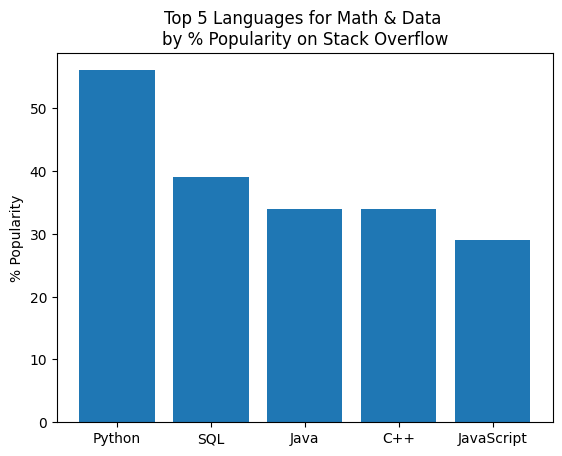

In [44]:
# Here is the code that we used to generate the graph below

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')

plt.show()

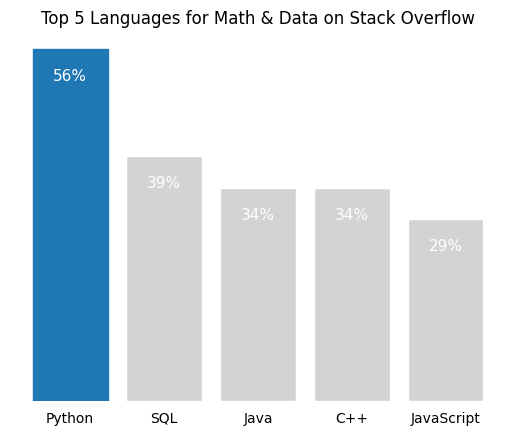

In [45]:
# Write your implementation to improve this chart below this line

######### SOLUTION #########
# Use a subtle color palette
bars = plt.bar(pos, popularity, align='center', color='lightgray', edgecolor='white')

# Highlight the most popular one (Python in this case) in a different color
bars[0].set_color('#1F77B4')

# Show only languages on X-axis, no ticks
plt.xticks(pos, languages)
# Make title more concise
plt.title('Top 5 Languages for Math & Data on Stack Overflow')

# Remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# Remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)

plt.show()

######### SOLUTION END #########

## Rubric

- +18 points for correctness (following all the principles of visualization taught in the class to de-junk the given chart)
- +2 points for proper comments and variable names

# Part III: \#GenY vs. \#GenZ (10 points)

We hypothesize that people born between 1981 and 1996 i.e. **Gen Y** or **Millenials** use on average less hashtags on Twitter than **Gen Z** i.e. people born between 1997 and 2015. We would like to conduct statistical analysis to test our hypothesis. We have provided you below with 2 lists of number of hashtags tweeted by both the groups. Each list is a sample of 10,000 tweets by randomy sampled 10,000 individuals identified within each group. Use your knowledge of hypothesis testing and Scipy to conduct a significance test to test the difference in means of the hashtag usage between two groups.

In [46]:
samples_genY = [3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 2.0, 4.0, 5.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 4.0, 4.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 4.0, 0.0, 7.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, -1.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 1.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 5.0, 2.0, 4.0, 1.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 2.0, 1.0, 3.0, 2.0, 5.0, 5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 6.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, -0.0, 2.0, 5.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 5.0, 3.0, 0.0, 5.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 1.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 5.0, 4.0, 3.0, 5.0, 3.0, 2.0, 2.0, 3.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0, 3.0, 2.0, 0.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 5.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 5.0, 2.0, 2.0, 1.0, 4.0, 2.0, 5.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 1.0, 5.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 6.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 6.0, 2.0, 4.0, 5.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 1.0, 2.0, 3.0, 5.0, 3.0, 6.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 0.0, 2.0, 2.0, 5.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 5.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 1.0, 3.0, 2.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 6.0, 3.0, 5.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 6.0, 4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 0.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 1.0, 4.0, 3.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 5.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 0.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 5.0, 2.0, 3.0, 3.0, 5.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 5.0, 2.0, 5.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 4.0, 1.0, 5.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 2.0, 5.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 5.0, 5.0, 4.0, 4.0, 1.0, 2.0, 4.0, 3.0, 3.0, 4.0, 6.0, 3.0, 5.0, 3.0, 5.0, 4.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 0.0, 2.0, 5.0, 3.0, 3.0, 0.0, 1.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 6.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 1.0, 0.0, 3.0, 3.0, 4.0, 5.0, 1.0, 5.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 3.0, 0.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 5.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 6.0, 2.0, 1.0, 5.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 4.0, 5.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 1.0, 0.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 4.0, 2.0, 1.0, 6.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 1.0, 0.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 5.0, 3.0, 5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 5.0, 2.0, 1.0, 2.0, 5.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 1.0, 4.0, 5.0, 3.0, 3.0, 5.0, 1.0, 2.0, 5.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 1.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 1.0, 5.0, 4.0, 5.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 5.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 0.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 6.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.0, 3.0, 2.0, 1.0, 4.0, 2.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 6.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 3.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 5.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 6.0, 5.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 2.0, 5.0, 3.0, 4.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 1.0, 2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 0.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 0.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 5.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 1.0, 1.0, 5.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 4.0, 5.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 4.0, 4.0, 5.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0, 5.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 5.0, 1.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 5.0, 6.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 3.0, 1.0, 4.0, 2.0, 2.0, 5.0, 4.0, 4.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 5.0, 4.0, 1.0, 5.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 1.0, 5.0, 3.0, 4.0, 5.0, 1.0, 3.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 5.0, 2.0, 3.0, 5.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 4.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 1.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 1.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, -0.0, 4.0, 1.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 5.0, 1.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 5.0, 1.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 3.0, 1.0, 3.0, -0.0, 4.0, 2.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 5.0, 1.0, 5.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 6.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 5.0, 3.0, 1.0, 2.0, 5.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 5.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 2.0, 5.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 1.0, 4.0, 5.0, 2.0, 5.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 0.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 2.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 5.0, 2.0, 3.0, 1.0, 4.0, 4.0, 6.0, 3.0, 2.0, 1.0, 5.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 3.0, 6.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 4.0, 3.0, 1.0, 4.0, 4.0, 4.0, 4.0, 3.0, 1.0, 5.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 1.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 2.0, 3.0, 5.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 1.0, 5.0, 3.0, 4.0, 3.0, 4.0, 5.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 5.0, 4.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 6.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 5.0, 4.0, 4.0, 5.0, 2.0, 5.0, 1.0, 4.0, 3.0, 3.0, 5.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 1.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 6.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, -0.0, 5.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 5.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 1.0, 6.0, 4.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 4.0, 1.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 5.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 2.0, 6.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 5.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 5.0, 3.0, 2.0, 6.0, 2.0, 3.0, 3.0, 6.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 0.0, 5.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 6.0, 5.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 1.0, 4.0, 5.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 5.0, 1.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 1.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 5.0, 1.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, -0.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 6.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 4.0, 1.0, 4.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 1.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 5.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 5.0, 5.0, 6.0, 4.0, 4.0, 3.0, 6.0, 6.0, 1.0, 3.0, 3.0, 2.0, 3.0, 0.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 0.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 2.0, 5.0, 3.0, 4.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 5.0, 4.0, 3.0, 3.0, 5.0, 5.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 1.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 1.0, 3.0, 5.0, 3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 4.0, 4.0, 5.0, 1.0, 3.0, 3.0, 1.0, 2.0, 1.0, 4.0, 2.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 1.0, 4.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 1.0, 4.0, 3.0, 5.0, 6.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 6.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 2.0, 1.0, 5.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 1.0, 3.0, 4.0, 2.0, 0.0, 3.0, 2.0, 2.0, 1.0, 0.0, 2.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 0.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 0.0, 1.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 2.0, 5.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 5.0, 4.0, 3.0, 6.0, 2.0, 4.0, 1.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 5.0, 1.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 4.0, 1.0, 2.0, 1.0, 3.0, 4.0, 1.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 1.0, 3.0, 5.0, 3.0, 3.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 1.0, 0.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 1.0, 4.0, 2.0, 4.0, 2.0, 3.0, 5.0, 1.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 0.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 5.0, 1.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 0.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 1.0, 1.0, 3.0, 3.0, 4.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 0.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 4.0, 2.0, 3.0, 5.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 2.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 5.0, 3.0, 5.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 5.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 1.0, 3.0, 2.0, 5.0, 2.0, 4.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 0.0, 4.0, 4.0, 2.0, 4.0, 1.0, 1.0, 4.0, 2.0, 2.0, 5.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 0.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, -0.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 5.0, 1.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 5.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 0.0, 2.0, 5.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 3.0, 4.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 2.0, 5.0, 5.0, 3.0, 2.0, 0.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 1.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 1.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 5.0, 4.0, 4.0, 5.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 4.0, 5.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 5.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 1.0, 4.0, 3.0, 6.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 2.0, 4.0, 1.0, 2.0, 2.0, 4.0, 5.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 0.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 5.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 5.0, 5.0, 3.0, 1.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 4.0, 4.0, 1.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 5.0, 3.0, 4.0, 1.0, 4.0, 5.0, 3.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 1.0, 1.0, 5.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 5.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 5.0, 2.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 1.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 1.0, 4.0, 4.0, 2.0, 5.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 2.0, 4.0, 3.0, 5.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0, 2.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 0.0, 2.0, 4.0, 5.0, 3.0, 3.0, 4.0, 4.0, 5.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 3.0, 6.0, 3.0, 4.0, 5.0, 3.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 0.0, 3.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 5.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 5.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 4.0, 4.0, 1.0, 5.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 6.0, 2.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 5.0, 2.0, 2.0, 4.0, 2.0, 5.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 1.0, 3.0, 4.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 0.0, 2.0, 5.0, 3.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 1.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 6.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 5.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 5.0, 3.0, 3.0, 0.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 1.0, 5.0, 4.0, 3.0, 4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 6.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 5.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 5.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 1.0, 1.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 0.0, 3.0, 3.0, 5.0, 3.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 5.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 1.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 6.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 1.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 1.0, 1.0, 3.0, 4.0, 3.0, 0.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 5.0, 4.0, 3.0, 5.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 4.0, 0.0, 2.0, 3.0, 6.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 5.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 2.0, 1.0, 3.0, 4.0, 4.0, 6.0, 3.0, 2.0, 5.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 1.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 1.0, 3.0, 5.0, 4.0, 1.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 0.0, 3.0, 3.0, 2.0, 3.0, 6.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 3.0, 4.0, 4.0, 2.0, 1.0, 3.0, 3.0, 2.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 5.0, 2.0, 3.0, 5.0, 3.0, 2.0, 5.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 4.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0, 5.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 5.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 5.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 0.0, 4.0, 2.0, 1.0, 4.0, 2.0, 3.0, 2.0, 5.0, 3.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 5.0, 2.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 6.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 5.0, 1.0, 6.0, 3.0, 3.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 5.0, 2.0, 4.0, 4.0, 4.0, 5.0, 3.0, 2.0, 1.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 5.0, 2.0, 4.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 1.0, 4.0, 4.0, 5.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 5.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 4.0, 3.0, 1.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 5.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 1.0, 5.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0, 3.0, 5.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 3.0, 5.0, 2.0, 5.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 5.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 0.0, 5.0, 5.0, 3.0, 1.0, 2.0, 4.0, 1.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 5.0, 5.0, 2.0, 3.0, 4.0, 2.0, 6.0, 1.0, 5.0, 2.0, 3.0, 5.0, 3.0, 4.0, 1.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 1.0, 4.0, 3.0, 5.0, 1.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 1.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 5.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 1.0, 3.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 1.0, 2.0, 3.0, 4.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, -0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 4.0, 7.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 6.0, 5.0, 3.0, 1.0, 3.0, 1.0, 3.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 2.0, 5.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 2.0, 5.0, 4.0, 4.0, 1.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 1.0, 4.0, 1.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 0.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, -0.0, 2.0, 4.0, 1.0, 2.0, 4.0, 4.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 1.0, 2.0, 2.0, 3.0, 2.0, 4.0, 5.0, 2.0, 5.0, 4.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0, 1.0, 3.0, 2.0, 2.0, 4.0, 4.0, 4.0, 3.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 4.0, -1.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 1.0, 4.0, 4.0, 2.0, 2.0, 4.0, 5.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 4.0, 5.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 5.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 1.0, 3.0, 6.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 5.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 5.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 2.0, 4.0, 5.0, 4.0, 7.0, 4.0, 2.0, 2.0, 1.0, 4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 5.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 2.0, 2.0, 4.0, 1.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 4.0, 1.0, 4.0, 2.0, 4.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 6.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 5.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 5.0, 5.0, 4.0, 2.0, 2.0, 5.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 1.0, 4.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 0.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0, 4.0, 4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 5.0, 4.0, 5.0, 5.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 1.0, 4.0, 3.0, 5.0, 5.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 4.0, 2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 1.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 6.0, 2.0, 5.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 1.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 5.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 6.0, 3.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 1.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 6.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 1.0, 3.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.0, 0.0, 2.0, 4.0, 5.0, 2.0, 3.0, 3.0, 1.0, 2.0, 4.0, 2.0, 3.0, 1.0, 2.0, 1.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.0, 3.0, 2.0, 6.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 5.0, 4.0, 2.0, 5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 2.0, 1.0, 2.0, 5.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 1.0, 4.0, 3.0, 1.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 5.0, 5.0, 0.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 6.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 2.0, 4.0, 5.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 1.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 3.0, 5.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 5.0, 3.0, 0.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 1.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 5.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 2.0, 4.0, 5.0, 5.0, 5.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 1.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 5.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 1.0, -0.0, 4.0, 3.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 6.0, 3.0, 5.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 5.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 5.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 1.0, 1.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 5.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 5.0, 3.0, 3.0, 0.0, 4.0, 1.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 1.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 5.0, 5.0, 4.0, 4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 1.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 6.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 6.0, 3.0, 2.0, 5.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 2.0, 6.0, 5.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 5.0, 2.0, 4.0, 3.0, 2.0, 3.0, 1.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 1.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 5.0, 2.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 1.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 0.0, 4.0, 2.0, 2.0, 5.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 1.0, 4.0, 3.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, -0.0, 1.0, 5.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 2.0, 4.0, 5.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 4.0, 5.0, 2.0, 3.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 5.0, 1.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 5.0, 3.0, 3.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 5.0, 3.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 5.0, 2.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 5.0, 5.0, 3.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 5.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 5.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 3.0, 5.0, 0.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 5.0, 2.0, 4.0, 4.0, 1.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 1.0, 2.0, 3.0, 5.0, 2.0, 3.0, 5.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 2.0, 4.0, 3.0, 5.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 5.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, -0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 0.0, 1.0, 2.0, 5.0, 3.0, 4.0, 4.0, 5.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 2.0, 4.0, 2.0, 2.0, 1.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 4.0, 1.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0]
samples_genZ = [3.0, 5.0, 4.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 3.0, 5.0, 4.0, 2.0, 4.0, 1.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 5.0, 4.0, 5.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 4.0, 4.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 2.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.0, 3.0, 1.0, 1.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 2.0, 2.0, 3.0, 5.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 5.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 5.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 6.0, 4.0, 5.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 1.0, 3.0, 2.0, 4.0, 6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 1.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 5.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 2.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 0.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 6.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 5.0, 4.0, 3.0, 1.0, 3.0, 5.0, 2.0, 3.0, 4.0, 4.0, 1.0, 1.0, 5.0, 1.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 0.0, 4.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 5.0, 5.0, 4.0, 2.0, 3.0, 2.0, 2.0, 1.0, 5.0, 4.0, 3.0, 2.0, 3.0, 5.0, 5.0, 4.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 5.0, 4.0, 3.0, 4.0, 3.0, 4.0, 0.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 5.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 4.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 5.0, 4.0, 3.0, 5.0, 5.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 1.0, 3.0, 5.0, 0.0, 4.0, 1.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 6.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 4.0, 2.0, 2.0, 5.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 1.0, 3.0, 3.0, 5.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 6.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 1.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, -0.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 6.0, 4.0, 1.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 5.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 5.0, 5.0, 3.0, 2.0, 3.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 5.0, 3.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 6.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 4.0, 4.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 6.0, 3.0, 5.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 5.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 4.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 4.0, 3.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 5.0, 5.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 5.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 1.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 5.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 5.0, 2.0, 3.0, 2.0, 6.0, 2.0, 3.0, 2.0, 3.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 5.0, 2.0, 1.0, 2.0, 0.0, 4.0, 3.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 5.0, 2.0, 4.0, 4.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 6.0, 3.0, 2.0, 4.0, 4.0, 1.0, 1.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 1.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 1.0, 5.0, 2.0, 2.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 4.0, 2.0, 3.0, 5.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 6.0, 1.0, 3.0, 5.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 5.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 2.0, 5.0, 4.0, 4.0, 4.0, 1.0, 4.0, 2.0, 2.0, 3.0, 0.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 4.0, 2.0, 1.0, 1.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 6.0, 3.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 5.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 1.0, 3.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 2.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 5.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 1.0, 3.0, 4.0, 1.0, 5.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 2.0, 1.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 4.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 5.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 2.0, 5.0, 1.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 6.0, 3.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 1.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 5.0, 0.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 5.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 3.0, 4.0, 2.0, 5.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 1.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 2.0, 2.0, 5.0, 1.0, 4.0, 4.0, 1.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 6.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 4.0, 5.0, 3.0, 3.0, -0.0, 3.0, 3.0, 2.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 2.0, 5.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 5.0, 1.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 5.0, 1.0, 2.0, 2.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 1.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 6.0, 5.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 0.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, -0.0, 3.0, 5.0, 5.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 1.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 4.0, 1.0, 4.0, 3.0, 5.0, 4.0, 2.0, 5.0, 4.0, 5.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 5.0, 1.0, 4.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 2.0, 1.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, 6.0, 3.0, 4.0, 2.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, -0.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 1.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 5.0, 5.0, 5.0, 2.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 3.0, 3.0, 0.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 4.0, 2.0, 4.0, 4.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 1.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 4.0, 3.0, 5.0, 4.0, 4.0, 2.0, 4.0, 1.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0, 4.0, 3.0, 5.0, 2.0, 4.0, 4.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 5.0, 4.0, 5.0, 2.0, 3.0, 2.0, 5.0, 3.0, 6.0, 4.0, 3.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, -0.0, 2.0, 4.0, 4.0, 2.0, 3.0, 5.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 0.0, 4.0, 2.0, 3.0, 4.0, 0.0, 3.0, 2.0, 4.0, 3.0, 4.0, 5.0, 3.0, 4.0, 1.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 1.0, 4.0, 5.0, 3.0, 4.0, 4.0, 1.0, 2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 6.0, 4.0, 3.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 1.0, 5.0, 5.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 5.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 1.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 0.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 4.0, 5.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 4.0, 5.0, 2.0, 4.0, 4.0, 5.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 4.0, 1.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 1.0, 3.0, 1.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 5.0, 3.0, 2.0, 4.0, 1.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 2.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 5.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 6.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 2.0, 4.0, 4.0, 3.0, 6.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 6.0, 3.0, 4.0, 2.0, 3.0, 1.0, 5.0, 4.0, 2.0, 4.0, 0.0, 4.0, 4.0, 7.0, 5.0, 5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 5.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 2.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 2.0, 2.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 1.0, 3.0, 3.0, 5.0, 3.0, 1.0, 4.0, 1.0, 6.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 2.0, 4.0, 2.0, 1.0, 3.0, 4.0, 3.0, 2.0, 0.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 1.0, 3.0, 6.0, 1.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 5.0, 4.0, 5.0, 3.0, 5.0, 4.0, 4.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 6.0, 1.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 2.0, 5.0, 5.0, 4.0, 1.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 5.0, 2.0, 1.0, 5.0, 3.0, 6.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 6.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, -1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 5.0, 4.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 1.0, 3.0, 1.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 1.0, 4.0, 1.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 1.0, 3.0, 1.0, 3.0, 4.0, 4.0, 3.0, 4.0, 5.0, 5.0, 3.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 1.0, 1.0, 3.0, 2.0, 4.0, 6.0, 4.0, 1.0, 3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 1.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 5.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 1.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 5.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 1.0, 2.0, 4.0, 4.0, 3.0, 2.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 3.0, 5.0, 4.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 5.0, 5.0, 3.0, 1.0, 1.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 4.0, 1.0, 1.0, 2.0, 4.0, 4.0, 1.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 1.0, 5.0, 4.0, 3.0, 3.0, 5.0, 1.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 1.0, 0.0, 5.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 5.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 4.0, 3.0, 1.0, 4.0, 3.0, 1.0, 3.0, 4.0, 1.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 5.0, 2.0, 4.0, 3.0, 4.0, 2.0, 1.0, 3.0, 5.0, 6.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0, 5.0, 2.0, 2.0, 1.0, 4.0, 2.0, 5.0, 4.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 0.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 1.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 0.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 3.0, 5.0, 4.0, 1.0, 0.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 5.0, 5.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 6.0, 4.0, 3.0, 4.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 5.0, 3.0, 2.0, 2.0, 5.0, 4.0, 2.0, 1.0, 1.0, 4.0, 4.0, 4.0, 2.0, 3.0, 5.0, 1.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 5.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 1.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 2.0, 4.0, 5.0, 1.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 1.0, 5.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.0, 5.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 6.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 4.0, 4.0, 1.0, 3.0, 4.0, 3.0, 2.0, 1.0, 4.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 3.0, 3.0, 1.0, 3.0, 1.0, 3.0, 6.0, 4.0, 3.0, 3.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 5.0, 2.0, 4.0, 5.0, 3.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 5.0, 4.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 1.0, 3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 0.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 6.0, 2.0, 4.0, 4.0, 3.0, 5.0, 1.0, 3.0, 4.0, 3.0, 0.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 4.0, 1.0, 3.0, 4.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 6.0, 4.0, 1.0, 5.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 5.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 1.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 1.0, 5.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 1.0, 3.0, 4.0, 3.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 5.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 3.0, 0.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 5.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 6.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 1.0, 4.0, 1.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 1.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 2.0, 5.0, 2.0, 4.0, 4.0, -0.0, 3.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 0.0, 3.0, 5.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, 1.0, 1.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 1.0, 1.0, 2.0, 5.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 1.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 6.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 5.0, 3.0, 1.0, 5.0, 3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 3.0, 3.0, 5.0, 2.0, 3.0, 1.0, 3.0, 2.0, 4.0, 5.0, 4.0, 2.0, 3.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 6.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, -0.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 1.0, 4.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 5.0, 5.0, 4.0, 3.0, 2.0, 3.0, 1.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0, 5.0, 3.0, 3.0, 1.0, 1.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 1.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 5.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 2.0, 1.0, 5.0, 2.0, 4.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 5.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 5.0, 4.0, 1.0, 2.0, 5.0, 5.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 6.0, 4.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 6.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 5.0, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 0.0, 4.0, 2.0, 4.0, 2.0, 3.0, 5.0, 5.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 5.0, 4.0, 1.0, 5.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 5.0, 2.0, 4.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 4.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 1.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 1.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 0.0, 2.0, 5.0, 3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 5.0, 1.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 0.0, 5.0, 1.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 0.0, 4.0, 2.0, 6.0, 4.0, 3.0, 2.0, 5.0, 6.0, 2.0, 5.0, 3.0, 4.0, 3.0, 4.0, 2.0, 1.0, 3.0, 1.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 5.0, 1.0, 4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 1.0, 4.0, 2.0, 4.0, 5.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 5.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 4.0, 1.0, 1.0, 5.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 1.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 5.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 4.0, 4.0, 3.0, 5.0, 4.0, 4.0, 4.0, 5.0, 3.0, 2.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 6.0, 4.0, 5.0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 5.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 5.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 2.0, 4.0, 1.0, 3.0, 3.0, 4.0, 5.0, 4.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 1.0, 5.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 5.0, 4.0, 2.0, 1.0, 2.0, 3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 0.0, 2.0, 2.0, 3.0, 3.0, 4.0, 1.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 4.0, 2.0, -0.0, 2.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 5.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 5.0, 3.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 6.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 6.0, 3.0, 5.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 1.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 4.0, 0.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 1.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 5.0, 4.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 6.0, 3.0, 1.0, 4.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0, 5.0, 3.0, 4.0, 2.0, 5.0, 2.0, 5.0, 1.0, 4.0, 2.0, 3.0, 1.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 6.0, 3.0, 4.0, 3.0, 2.0, 3.0, 6.0, 5.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 4.0, 2.0, 3.0, 3.0, 0.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 2.0, 5.0, 3.0, 3.0, 4.0, 6.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 6.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 5.0, 4.0, 2.0, 2.0, 5.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 2.0, 5.0, 2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 5.0, 2.0, 4.0, 3.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 2.0, 4.0, 5.0, 3.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 1.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, -0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 6.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 5.0, 3.0, 3.0, 2.0, 4.0, 4.0, 5.0, 2.0, 0.0, 2.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 2.0, 4.0, -0.0, 3.0, 2.0, 3.0, 4.0, 2.0, 5.0, 2.0, 4.0, 5.0, 3.0, 3.0, 3.0, 2.0, 5.0, 5.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 4.0, 5.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 4.0, 2.0, 3.0, 1.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 5.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 1.0, 4.0, 4.0, 3.0, 0.0, 2.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 6.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 6.0, 1.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 5.0, 4.0, 1.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 0.0, 2.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 4.0, 5.0, 4.0, 2.0, 5.0, 5.0, 4.0, 4.0, 1.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 5.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 0.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 0.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 5.0, 3.0, 2.0, 1.0, 5.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 4.0, 2.0, 3.0, 1.0, 5.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 3.0, 0.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 1.0, 4.0, 3.0, 4.0, 1.0, 4.0, 4.0, 3.0, 5.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 0.0, 4.0, 5.0, 3.0, 2.0, 4.0, 5.0, 4.0, 1.0, 3.0, 4.0, 2.0, 4.0, 1.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 1.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 1.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 3.0, 5.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 2.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 5.0, 5.0, 4.0, 2.0, 1.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 4.0, 1.0, 3.0, 0.0, 2.0, 4.0, 0.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 1.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 0.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 2.0, 4.0, 1.0, 3.0, 1.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 0.0, 3.0, 3.0, 4.0, 1.0, 5.0, 5.0, 2.0, 4.0, 4.0, 1.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 0.0, 5.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 5.0, 2.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 6.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 1.0, 3.0, 6.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 1.0, 3.0, 5.0, 3.0, 5.0, 1.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 1.0, 5.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 3.0, 5.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 2.0, 3.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 5.0, 5.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 5.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 1.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 0.0, 2.0, 1.0, 4.0, 3.0, 4.0, 3.0, 2.0, 6.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 1.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 1.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 1.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, 5.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 6.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 5.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 1.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 1.0, 2.0, 4.0, 3.0, 5.0, 3.0, 1.0, 2.0, 2.0, 4.0, 4.0, 0.0, 4.0, 5.0, 3.0, 2.0, 5.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 5.0, 2.0, 4.0, 5.0, 4.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 1.0, 3.0, 4.0, 1.0, 1.0, 2.0, 4.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 5.0, 2.0, 2.0, 2.0, 4.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 6.0, 4.0, 4.0, 2.0, 1.0, 5.0, 3.0, 5.0, 4.0, 1.0, 1.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 1.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 2.0, 2.0, 3.0, -0.0, 1.0, 1.0, 2.0, 4.0, 3.0, 3.0, 3.0, -0.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 4.0, 2.0, 3.0, 1.0, 5.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 3.0, 3.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 0.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 2.0, 3.0, 1.0, 1.0, 2.0, 6.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 4.0, 3.0, 2.0, 5.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 5.0, 2.0, 5.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 0.0, 1.0, 3.0, 2.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 6.0, 3.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 1.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 0.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 5.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 2.0, 4.0, 4.0, 2.0, 5.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 4.0, 5.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 5.0, 1.0, 3.0, 4.0, 2.0, 4.0, 1.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 5.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 1.0, 2.0, 4.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 1.0, 4.0, 5.0, 4.0, 4.0, 3.0, 0.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 0.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 2.0, 5.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 5.0, 5.0, 3.0, 2.0, 5.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 1.0, 5.0, 2.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 1.0, 2.0, 4.0, 4.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 1.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 5.0, 3.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 4.0, 2.0, 3.0, 5.0, 3.0, 2.0, 3.0, 5.0, 4.0, 5.0, 3.0, 2.0, 3.0, 5.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 1.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 1.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 0.0, 3.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 1.0, 4.0, 5.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 5.0, 3.0, 5.0, 4.0, 2.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 5.0, 4.0, 2.0, 5.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 1.0, 5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 4.0, 2.0, 4.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0]

In [47]:
# Write your implementation below this line

######### SOLUTION #########
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(samples_genY, samples_genZ)

# Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decide whether to reject the null hypothesis based on a significance level of 0.05
if p_value < 0.05:
    print("We reject the null hypothesis and conclude that there is a significant difference in the mean number of hashtags between Gen Y and Gen Z.")
else:
    print("We fail to reject the null hypothesis and cannot conclude that there's a significant difference in the mean number of hashtags between Gen Y and Gen Z.")


######### SOLUTION END #########

T-statistic: -1.5820118549401094
P-value: 0.11366267823020533
We fail to reject the null hypothesis and cannot conclude that there's a significant difference in the mean number of hashtags between Gen Y and Gen Z.


### Were you able to reject the null hypothesis?: [Write your answer below this line]

Since our p-value is 0.11, which is greater than 0.05, we fail to reject the null hypothesis. This means that there is no significant difference between the means of the two groups.

## Rubric

- +5 points for correctness
- +2 points for the right choice of test
- +2 points for conciseness
- +1 point for proper comments and variable names